In [89]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.python.data import Dataset
from sklearn import metrics
tf.logging.set_verbosity(tf.logging.ERROR)

In [66]:
emp_data = pd.read_csv("C:/Users/a.ezhilarasan/Downloads/train_LZdllcl.csv")

In [67]:
#shuffling the data
emp_data = emp_data.reindex(np.random.permutation(emp_data.index))
emp_data = emp_data.rename({'KPIs_met >80%':'KPIs_met_gt_80'}, axis='columns')
emp_data = emp_data.rename({'awards_won?':'awards_won'}, axis='columns')
emp_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won,avg_training_score,is_promoted
18207,39747,Sales & Marketing,region_2,Bachelor's,m,sourcing,1,54,1.0,25,0,0,46,0
51835,68888,Procurement,region_30,Bachelor's,f,other,1,30,4.0,5,0,0,74,0
9813,8738,HR,region_26,Bachelor's,f,other,1,27,3.0,2,0,0,53,0
52771,36205,Technology,region_15,Bachelor's,m,other,1,28,3.0,3,0,0,81,0
5552,49735,Sales & Marketing,region_5,Master's & above,m,sourcing,1,39,3.0,6,0,0,52,0


In [65]:
emp_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
13432,63473,Sales & Marketing,region_16,Bachelor's,m,sourcing,1,35,4.0,4,1,0,48,0
19853,61815,Procurement,region_28,Bachelor's,f,sourcing,1,26,3.0,3,0,0,72,0
44610,19463,Sales & Marketing,region_19,Bachelor's,f,other,1,36,3.0,4,0,0,48,0
6997,39635,HR,region_30,Bachelor's,m,sourcing,1,35,3.0,3,0,0,51,0
9806,13254,Legal,region_7,Bachelor's,m,other,1,32,3.0,3,0,0,58,0


In [17]:
#Exploratory Data Analysis
emp_data['region'].value_counts()


region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,is_promoted
7144,39125,Sales & Marketing,region_31,Bachelor's,m,sourcing,1,23,NaN,1,0,0,50,0
26371,69476,Sales & Marketing,region_2,Master's & above,m,other,1,42,3.0,16,0,0,47,0
2410,62776,Technology,region_1,Master's & above,f,other,2,32,1.0,6,0,0,83,0
41804,4441,Analytics,region_11,Bachelor's,m,sourcing,1,37,3.0,9,0,0,88,0
9344,49218,Analytics,region_22,Bachelor's,m,other,1,27,NaN,1,0,0,83,0
29409,54421,Operations,region_34,Bachelor's,m,sourcing,1,33,3.0,5,1,0,58,0
15597,30644,Sales & Marketing,region_11,Bachelor's,m,other,1,30,4.0,3,0,0,48,0
35112,34909,Procurement,region_2,Bachelor's,f,other,1,34,4.0,9,1,0,71,0
35089,38125,Sales & Marketing,region_11,Bachelor's,m,sourcing,1,26,NaN,1,1,0,49,0
27790,21154,Operations,region_16,Bachelor's,f,other,1,39,3.0,3,1,0,59,0


In [ ]:
_= emp_data['age'].hist()

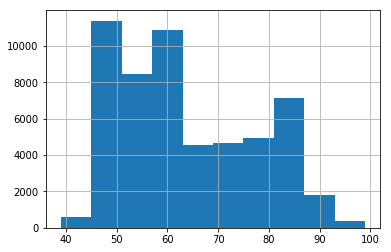

In [5]:
_= emp_data['avg_training_score'].hist()

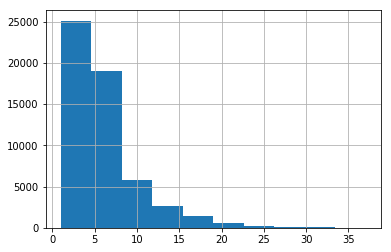

In [6]:
_= emp_data['length_of_service'].hist()

In [7]:
emp_data['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [33]:
emp_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [83]:
#Preprocess features and targets
def preprocess_features(df):
    selected_features = df[['department','region','gender','recruitment_channel','no_of_trainings','age','length_of_service','KPIs_met_gt_80','awards_won','avg_training_score']]
    processed_features = selected_features.copy()
    return(processed_features)

def preprocess_targets(df):
    targets = pd.DataFrame()
    targets['is_promoted'] = df['is_promoted']
    return(targets)


    

In [70]:
#Splitting training and validation set
emp_data.shape
training_examples = preprocess_features(emp_data.head(40000))
training_targets = preprocess_targets(emp_data.head(40000))
validation_examples = preprocess_features(emp_data.tail(14808))
validation_targets = preprocess_targets(emp_data.tail(14808))


In [71]:
#Make sure both training and validation set represent same data
print(training_examples.describe())
print(validation_examples.describe())


       no_of_trainings           age  length_of_service  KPIs_met_gt_80  \
count     40000.000000  40000.000000       40000.000000    40000.000000   
mean          1.254175     34.811125           5.866925        0.352375   
std           0.609491      7.671351           4.255980        0.477716   
min           1.000000     20.000000           1.000000        0.000000   
25%           1.000000     29.000000           3.000000        0.000000   
50%           1.000000     33.000000           5.000000        0.000000   
75%           1.000000     39.000000           7.000000        1.000000   
max          10.000000     60.000000          34.000000        1.000000   

         awards_won  avg_training_score  
count  40000.000000        40000.000000  
mean       0.022750           63.329650  
std        0.149107           13.372451  
min        0.000000           39.000000  
25%        0.000000           51.000000  
50%        0.000000           60.000000  
75%        0.000000           

In [127]:
training_targets['is_promoted'].value_counts()

0    36590
1     3410
Name: is_promoted, dtype: int64

In [18]:
emp_data['length_of_service'].unique()

array([ 1, 16,  6,  9,  5,  3,  2,  7, 10,  8, 13,  4, 12, 15, 19, 14, 17,
       18, 33, 11, 22, 24, 29, 21, 23, 20, 27, 26, 25, 28, 32, 31, 34, 30,
       37], dtype=int64)

In [72]:
def get_quantile_based_boundaries(feature, num_buckets):
    boundaries = np.arange(1.0, num_buckets) / num_buckets
    quantiles = feature.quantile(boundaries)
    return [quantiles[q] for q in quantiles.keys()]


In [85]:
def construct_feature_columns(df):
    department = tf.feature_column.categorical_column_with_vocabulary_list(
        key='department',
        vocabulary_list=df['department'].unique(),
        default_value = 0)
    region = tf.feature_column.categorical_column_with_vocabulary_list(
        key='region',
        vocabulary_list=df['region'].unique(),
        default_value = 0)
    #education = tf.feature_column.categorical_column_with_vocabulary_list(key='education',vocabulary_list=df['education'].unique(),default_value = 0)
        
    gender = tf.feature_column.categorical_column_with_vocabulary_list(
        key='gender',
        vocabulary_list=df['gender'].unique(),
        default_value=0)
    recruitment_channel = tf.feature_column.categorical_column_with_vocabulary_list(
        key='recruitment_channel',
        vocabulary_list=df['recruitment_channel'].unique(),
        default_value=0)
    no_of_trainings = tf.feature_column.categorical_column_with_vocabulary_list(
        key='no_of_trainings',
        vocabulary_list=df['no_of_trainings'].unique(),
        default_value=0)
    #previous_year_rating = tf.feature_column.categorical_column_with_vocabulary_list(key='previous_year_rating', vocabulary_list=df['previous_year_rating'].unique(), default_value=0)
    length_of_service = tf.feature_column.categorical_column_with_vocabulary_list(
        key='length_of_service',
        vocabulary_list=df['length_of_service'].unique(),
        default_value=0)
    KPIs_met_gt_80 = tf.feature_column.categorical_column_with_vocabulary_list(
        key='KPIs_met_gt_80',
        vocabulary_list=df['KPIs_met_gt_80'].unique(),
        default_value=0)
    awards_won = tf.feature_column.categorical_column_with_vocabulary_list(
        key='awards_won',
        vocabulary_list=df['awards_won'].unique(),
        default_value=0)
    age = tf.feature_column.numeric_column('age')
    avg_training_score = tf.feature_column.numeric_column('avg_training_score')
    bucketized_age = tf.feature_column.bucketized_column(
        age, 
        boundaries=get_quantile_based_boundaries(df['age'],num_buckets=7))
    bucketized_avg_training_score = tf.feature_column.bucketized_column(
        avg_training_score,
        boundaries=get_quantile_based_boundaries(df['avg_training_score'],num_buckets = 7))
    KPIs_X_training_score = tf.feature_column.crossed_column(set([KPIs_met_gt_80,bucketized_avg_training_score]),hash_bucket_size=1000)
    no_of_trainings_X_awards_won = tf.feature_column.crossed_column(set([no_of_trainings, awards_won]),hash_bucket_size=1000)
    feature_columns = set([department,region,gender,recruitment_channel,no_of_trainings,
                          length_of_service,KPIs_met_gt_80,awards_won,
                          bucketized_age,bucketized_avg_training_score,KPIs_X_training_score])
    return feature_columns


In [86]:
def my_input(features, targets, batch_size, shuffle=True, num_epochs=None):
    features = {key:np.array(value) for key,value in dict(features).items()} 
    ds = Dataset.from_tensor_slices((features, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
        ds = ds.shuffle(10000)
    
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels


In [130]:
def train_model(training_examples, training_targets, validation_examples, validation_targets,
               steps, learning_rate, batch_size):
    training_input_fn = lambda: my_input(training_examples, training_targets, batch_size=1)
    prediction_input_fn = lambda: my_input(validation_examples, validation_targets, batch_size=batch_size, 
                                           shuffle=False, num_epochs = 1)
    
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_classifier = tf.estimator.LinearClassifier(feature_columns=construct_feature_columns(training_examples), 
                                                      optimizer=my_optimizer)                                                  
    
    periods = 10
    steps_per_period = steps/periods;
    #LOG_LOSS=[]
    print("Training model: ")
    for period in range(1,periods):
        print("Period: %02d" %period)
        linear_classifier.train(input_fn = training_input_fn, steps = steps_per_period)
        validation_probabilities = linear_classifier.predict(input_fn = prediction_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
        log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        print("Log loss: %0.2f" %log_loss)
        validation_predictions = DNNclassifier.predict(input_fn = prediction_input_fn)
        validation_predictions = np.array([item['class_ids'][0] for item in validation_predictions])
        print("sum of 0s in prediction: ",sum(validation_predictions == 0))
        #LOG_LOSS.append(log_loss)
        evaluation_metrics = linear_classifier.evaluate(input_fn= prediction_input_fn)
        print(" Accuracy: %0.2f" %evaluation_metrics['accuracy'])
        print("AUC: %0.2f" %evaluation_metrics['auc'])
    return linear_classifier


        
        

In [131]:
linear_classifier = train_model(training_examples,training_targets,
                               validation_examples, validation_targets,
                               steps = 500, learning_rate = 0.001, batch_size = 10)

Training model: 
Period: 01
Log loss: 0.65
sum of 0s in prediction:  14808
 Accuracy: 0.92
AUC: 0.57
Period: 02
Log loss: 0.61


KeyboardInterrupt: 

In [108]:
def construct_DNN_feature_columns(df):
    department = tf.feature_column.categorical_column_with_vocabulary_list(
        key='department',
        vocabulary_list=df['department'].unique(),
        default_value = 0)
    region = tf.feature_column.categorical_column_with_vocabulary_list(
        key='region',
        vocabulary_list=df['region'].unique(),
        default_value = 0)
    #education = tf.feature_column.categorical_column_with_vocabulary_list(key='education',vocabulary_list=df['education'].unique(),default_value = 0)
        
    gender = tf.feature_column.categorical_column_with_vocabulary_list(
        key='gender',
        vocabulary_list=df['gender'].unique(),
        default_value=0)
    recruitment_channel = tf.feature_column.categorical_column_with_vocabulary_list(
        key='recruitment_channel',
        vocabulary_list=df['recruitment_channel'].unique(),
        default_value=0)
    no_of_trainings = tf.feature_column.categorical_column_with_vocabulary_list(
        key='no_of_trainings',
        vocabulary_list=df['no_of_trainings'].unique(),
        default_value=0)
    #previous_year_rating = tf.feature_column.categorical_column_with_vocabulary_list(key='previous_year_rating', vocabulary_list=df['previous_year_rating'].unique(), default_value=0)
    length_of_service = tf.feature_column.categorical_column_with_vocabulary_list(
        key='length_of_service',
        vocabulary_list=df['length_of_service'].unique(),
        default_value=0)
    KPIs_met_gt_80 = tf.feature_column.categorical_column_with_vocabulary_list(
        key='KPIs_met_gt_80',
        vocabulary_list=df['KPIs_met_gt_80'].unique(),
        default_value=0)
    awards_won = tf.feature_column.categorical_column_with_vocabulary_list(
        key='awards_won',
        vocabulary_list=df['awards_won'].unique(),
        default_value=0)
    age = tf.feature_column.numeric_column('age')
    avg_training_score = tf.feature_column.numeric_column('avg_training_score')
    bucketized_age = tf.feature_column.bucketized_column(
        age, 
        boundaries=get_quantile_based_boundaries(df['age'],num_buckets=7))
    bucketized_avg_training_score = tf.feature_column.bucketized_column(
        avg_training_score,
        boundaries=get_quantile_based_boundaries(df['avg_training_score'],num_buckets = 7))
    department_ind = tf.feature_column.indicator_column(department)
    region_ind = tf.feature_column.indicator_column(region)
    gender_ind = tf.feature_column.indicator_column(gender)
    recruitment_channel_ind = tf.feature_column.indicator_column(recruitment_channel)
    no_of_trainings_ind = tf.feature_column.indicator_column(no_of_trainings)
    length_of_service_ind = tf.feature_column.indicator_column(length_of_service)
    KPIs_met_gt_80_ind = tf.feature_column.indicator_column(KPIs_met_gt_80)
    awards_won_ind = tf.feature_column.indicator_column(awards_won)
    gender_ind = tf.feature_column.indicator_column(gender)
    
    #KPIs_X_training_score = tf.feature_column.crossed_column(set([KPIs_met_gt_80,bucketized_avg_training_score]),hash_bucket_size=1000)
    #no_of_trainings_X_awards_won = tf.feature_column.crossed_column(set([no_of_trainings, awards_won]),hash_bucket_size=1000)
    feature_columns = set([department_ind,region_ind,gender_ind,recruitment_channel_ind,no_of_trainings_ind,
                          length_of_service_ind,KPIs_met_gt_80_ind,awards_won_ind,
                          bucketized_age,bucketized_avg_training_score])
    return feature_columns

In [128]:
#Train a DNN classifier
def train_DNNmodel(training_examples, training_targets, validation_examples, validation_targets,
               steps, learning_rate, batch_size, hidden_units):
    training_input_fn = lambda: my_input(training_examples, training_targets, batch_size=1)
    prediction_input_fn = lambda: my_input(validation_examples, validation_targets, batch_size=batch_size, 
                                           shuffle=False, num_epochs = 1)
    
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    DNNclassifier = tf.estimator.DNNClassifier(feature_columns=construct_DNN_feature_columns(training_examples), 
                                               n_classes=2,
                                                hidden_units=hidden_units,
                                                optimizer=my_optimizer)                                                  
    
    periods = 10
    steps_per_period = steps/periods;
    #LOG_LOSS=[]
    print("Training model: ")
    for period in range(1,periods):
        print("Period: %02d" %period)
        DNNclassifier.train(input_fn = training_input_fn, steps = steps_per_period)
        validation_probabilities = DNNclassifier.predict(input_fn = prediction_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
        log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        print("Log loss: %0.2f" %log_loss)
        #LOG_LOSS.append(log_loss)
        #f1 score
        validation_predictions = DNNclassifier.predict(input_fn = prediction_input_fn)
        validation_predictions = np.array([item['class_ids'][0] for item in validation_predictions])
        print("sum of 0s in prediction: ",sum(validation_predictions == 0))
        #f1_score = metrics.f1_score(validation_targets, validation_predictions)
        #print("F1 Score: %0.2f" %f1_score)
        evaluation_metrics = linear_classifier.evaluate(input_fn= prediction_input_fn)
        print(" Accuracy: %0.2f" %evaluation_metrics['accuracy'])
        print("AUC: %0.2f" %evaluation_metrics['auc'])
    return linear_classifier

In [129]:
DNNclassifier = train_DNNmodel(training_examples,training_targets,
                               validation_examples, validation_targets,
                               steps = 10000, learning_rate = 0.001, batch_size = 20, hidden_units = [10,20,30])

Training model: 
Period: 01
Log loss: 0.47
sum of 0s in prediction:  [14808]
 Accuracy: 0.92
AUC: 0.69
Period: 02
Log loss: 0.35
sum of 0s in prediction:  [14808]
 Accuracy: 0.92
AUC: 0.69
Period: 03


KeyboardInterrupt: 

In [148]:
prediction_input_fn = lambda: my_input(validation_examples, validation_targets, batch_size=20, 
                                           shuffle=False, num_epochs = 1)
validation_predictions = linear_classifier.predict(input_fn = prediction_input_fn)
print(validation_predictions)
#print([item.keys() for item in validation_predictions])
validation_predictions = np.array([item['classes'] for item in validation_predictions])
print(validation_predictions)
print("sum of 0s in prediction: ",sum(validation_predictions == 0))

<generator object Estimator.predict at 0x0000027740579360>
[[b'0']
 [b'0']
 [b'0']
 ...
 [b'0']
 [b'0']
 [b'0']]
sum of 0s in prediction:  [0]


In [140]:
training_targets['is_promoted'].value_counts()

0    36590
1     3410
Name: is_promoted, dtype: int64